In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data  = pd.read_csv("Dataset/hotel_bookings.csv")
data.head()
# data.loc[0:30,["reservation_status","is_canceled"]]
# data.loc[:,[ "is_repeated_guest", 
#                 "previous_cancellations", "previous_bookings_not_canceled", "customer_type


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape

(119390, 32)

In [67]:
data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
for col in data.columns:
    print(f"Value counts for column: {col}")
    print(data[col].value_counts())
    print()
    print()


Value counts for column: hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


Value counts for column: is_canceled
is_canceled
0    75166
1    44224
Name: count, dtype: int64


Value counts for column: lead_time
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
435       1
532       1
371       1
380       1
463       1
Name: count, Length: 479, dtype: int64


Value counts for column: arrival_date_year
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64


Value counts for column: arrival_date_month
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64


Value counts for column: arrival_date_week_number
arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

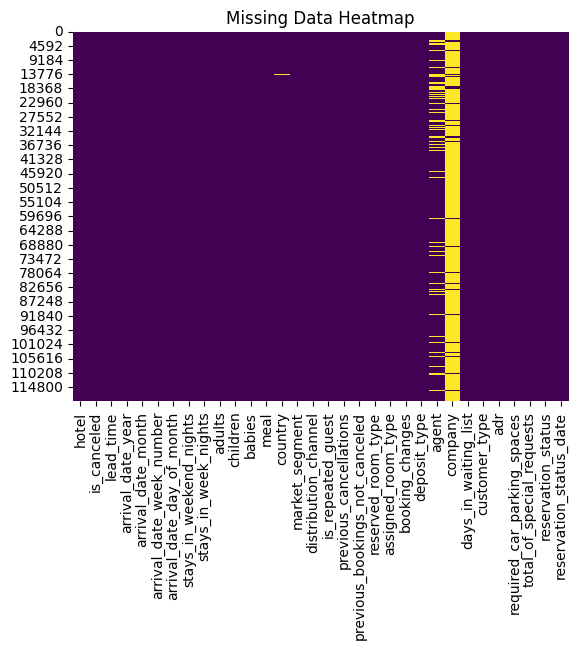

In [3]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

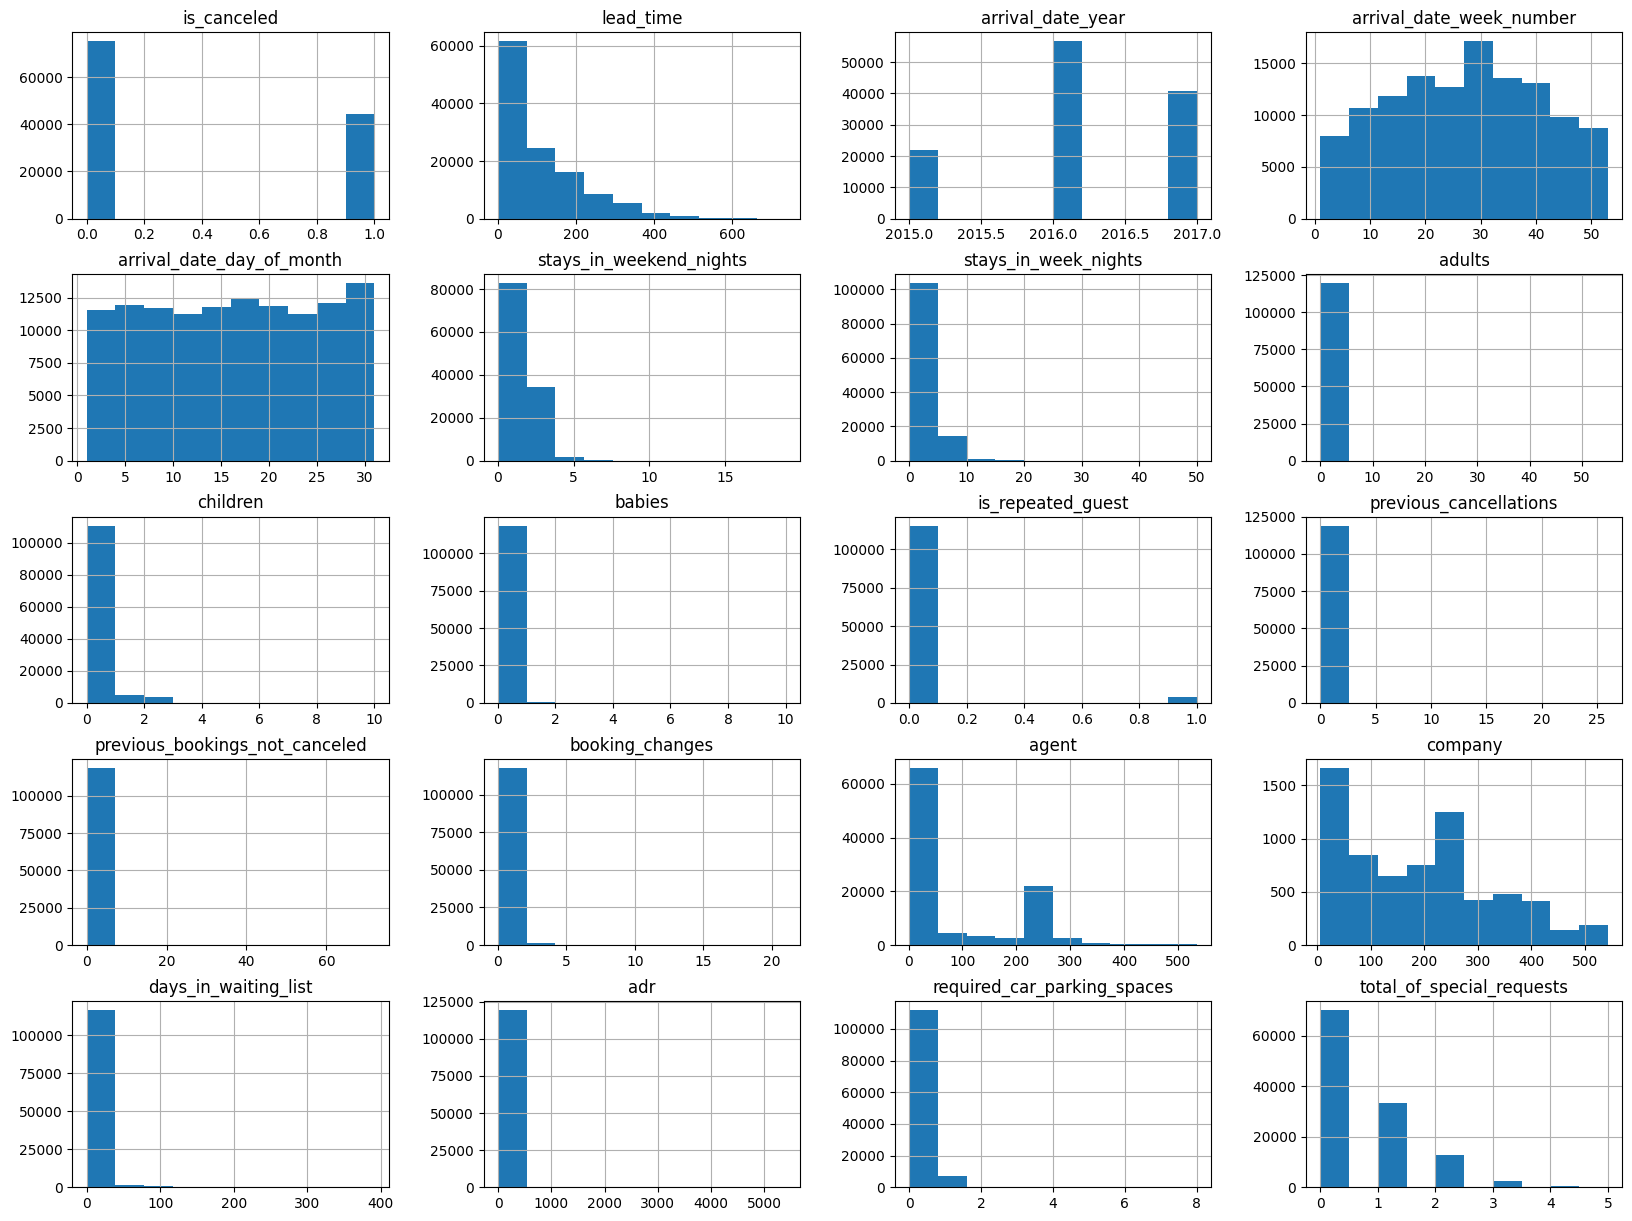

In [10]:
data.hist(figsize=(20, 15))
plt.show()

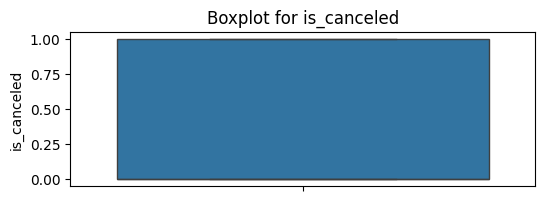

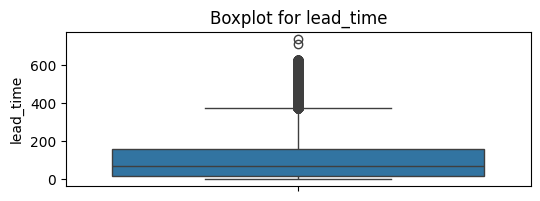

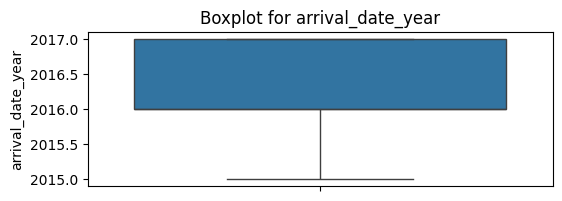

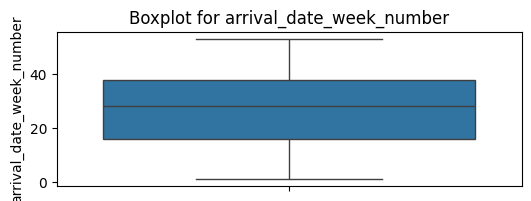

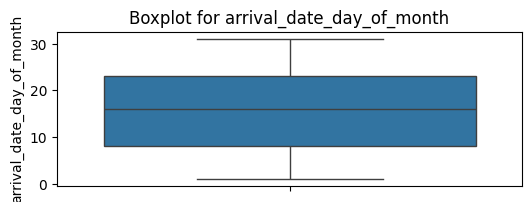

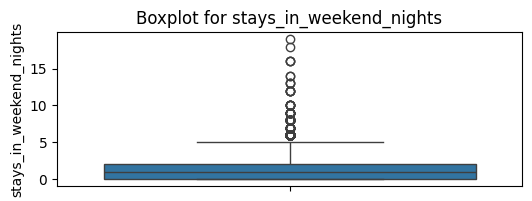

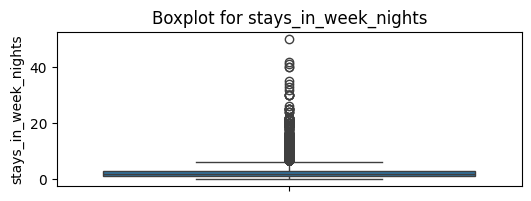

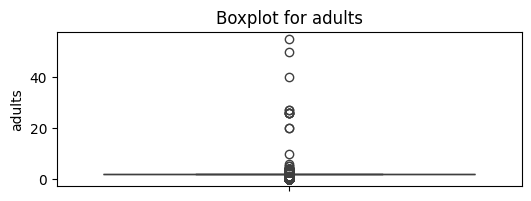

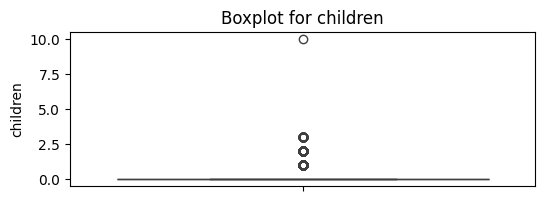

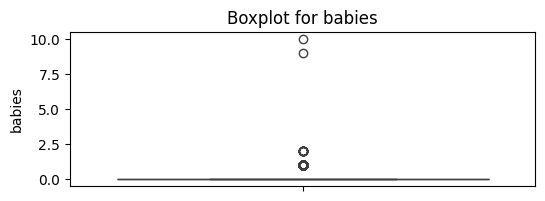

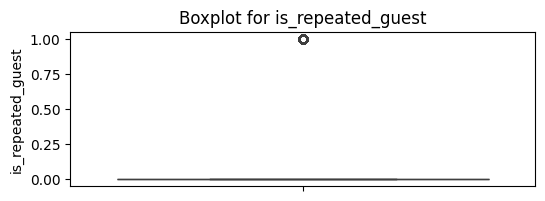

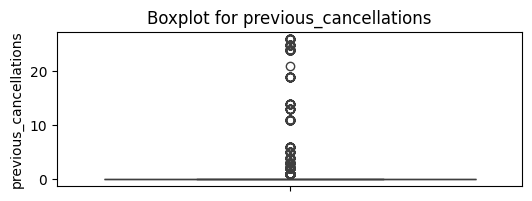

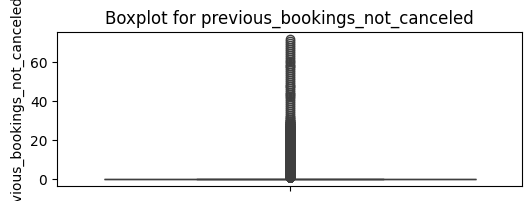

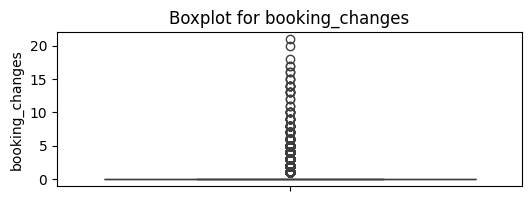

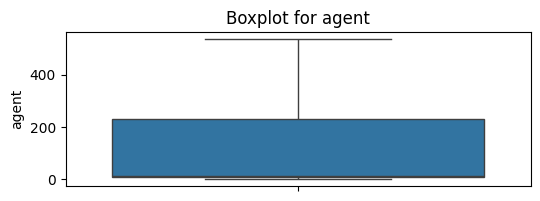

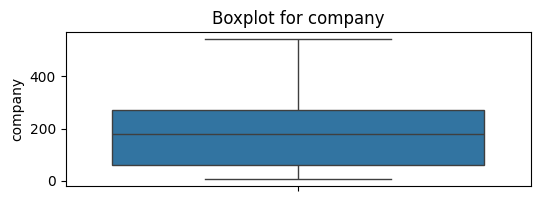

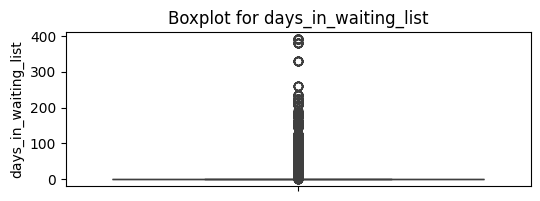

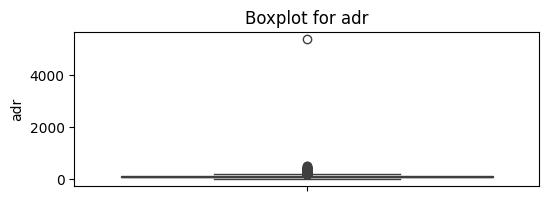

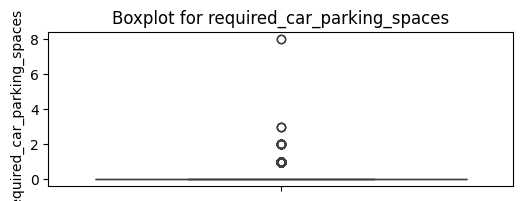

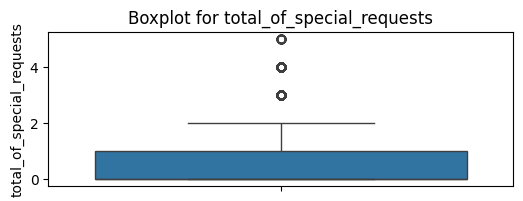

In [6]:
num = data.select_dtypes(include=[np.number]).columns
for col in num:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [34]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [12]:
print(data.nunique())
print(data.dtypes)

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

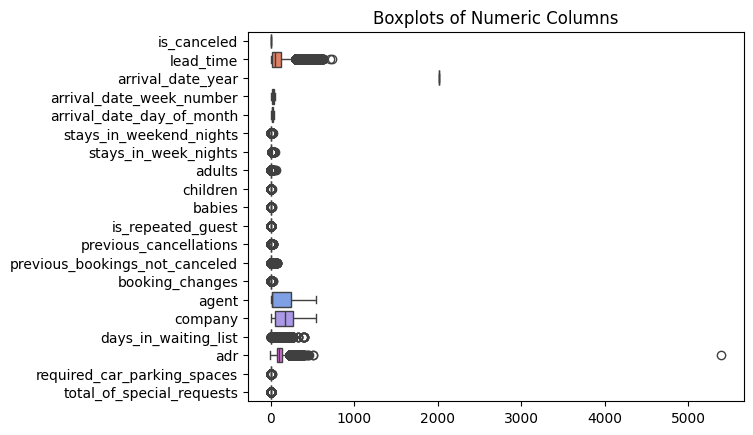

In [5]:
num = data.select_dtypes(include=[np.number]).columns
sns.boxplot(data=data[num], orient='h')
plt.title("Boxplots of Numeric Columns")
plt.show()

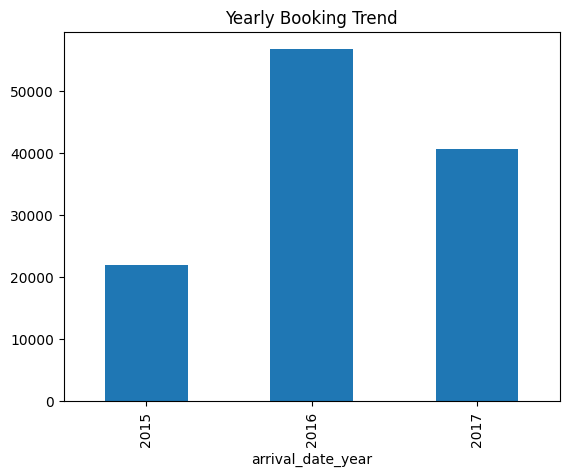

In [4]:
trend = data.groupby('arrival_date_year').size()
trend.plot(kind='bar', title='Yearly Booking Trend')
plt.show()

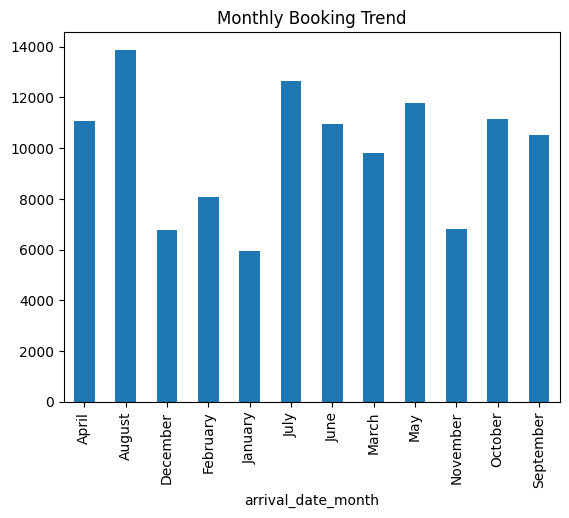

In [ ]:
trend = data.groupby('arrival_date_month').size()
trend.plot(kind='bar', title='Monthly Booking Trend')
plt.show()

C:\Users\Sky Solutions\AppData\Local\Temp\ipykernel_16896\657370349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reserved_room_type', y='stays_in_week_nights', data=data, estimator=np.mean, errorbar='sd', palette='viridis')


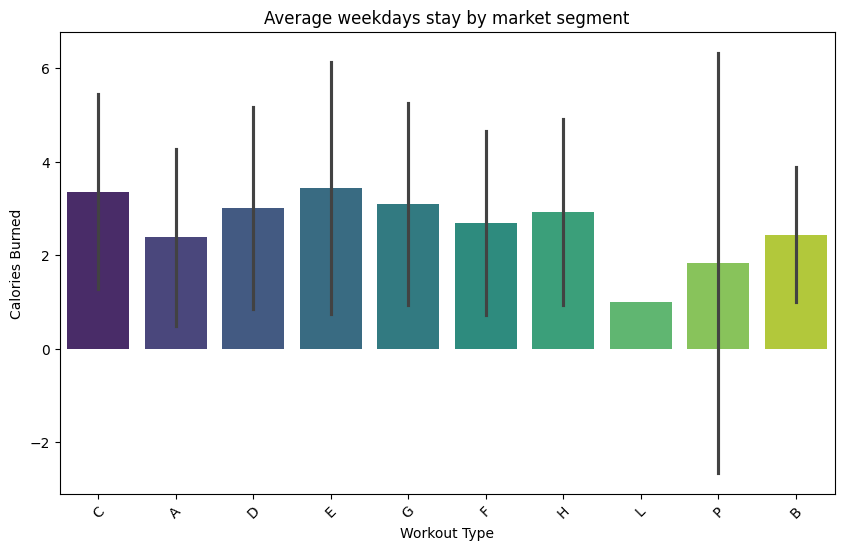

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='reserved_room_type', y='stays_in_week_nights', data=data, estimator=np.mean, errorbar='sd', palette='viridis')
plt.title("Average weekdays stay by market segment")
plt.xlabel("market segment")
plt.ylabel("stay in days") 
plt.xticks(rotation=45)
plt.show()

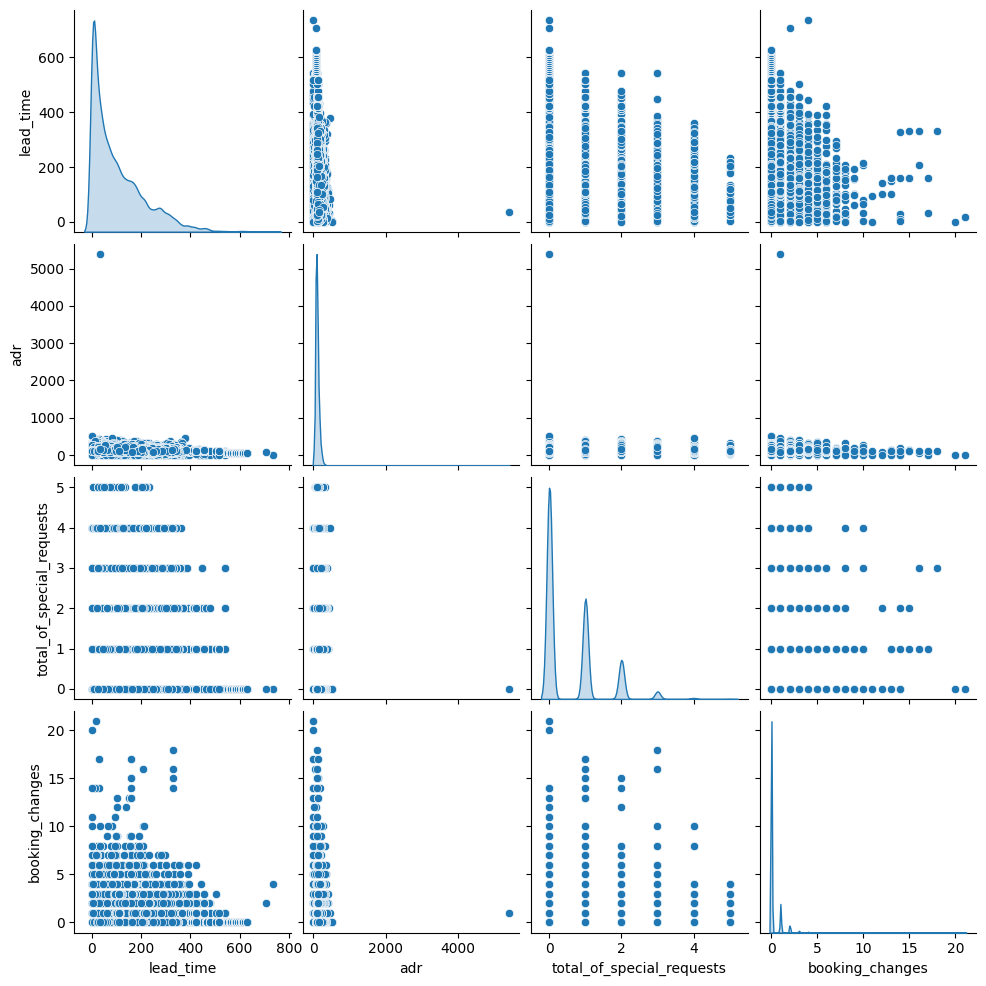

In [15]:
selected_columns = ['lead_time', 'adr', 'total_of_special_requests', 'booking_changes']
sns.pairplot(data[selected_columns], diag_kind='kde')
plt.show()


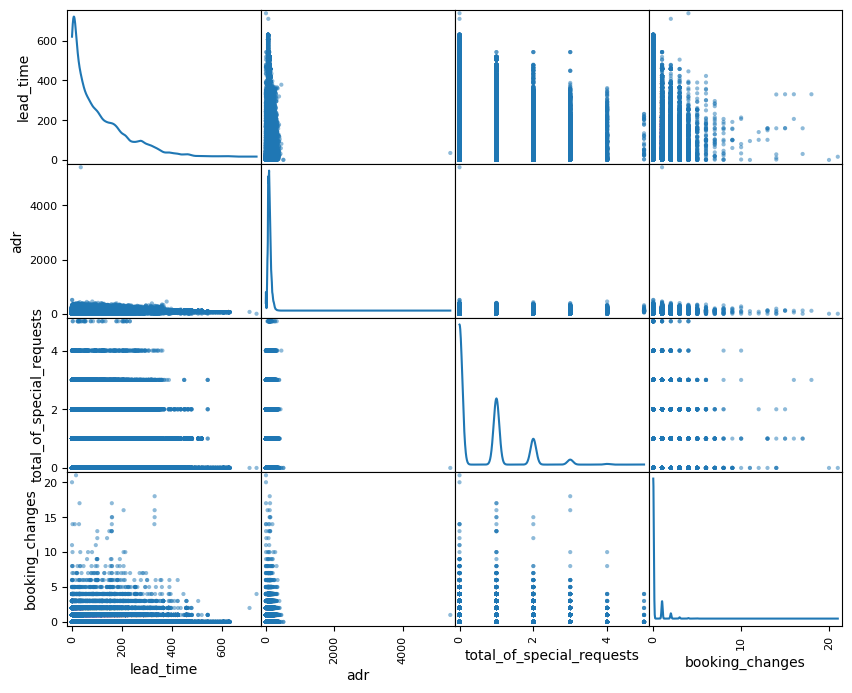

In [16]:
from pandas.plotting import scatter_matrix

selected_columns = ['lead_time', 'adr', 'total_of_special_requests', 'booking_changes']
scatter_matrix(data[selected_columns], figsize=(10, 8), diagonal='kde')
plt.show()


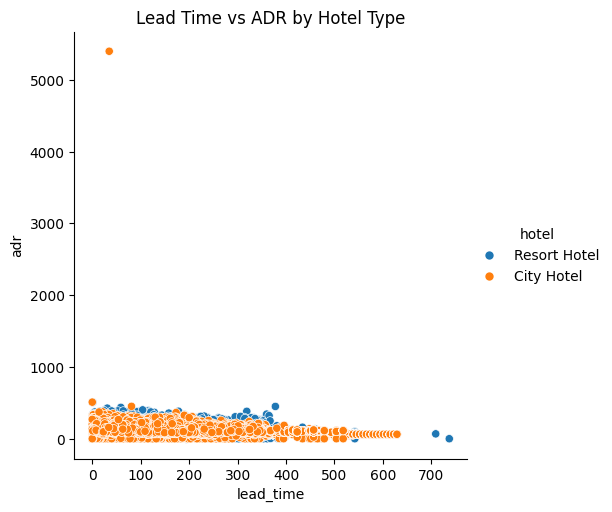

In [19]:
sns.relplot(
    data=data, 
    x='lead_time', 
    y='adr', 
    hue='hotel', 
    # style='is_canceled', 
    kind='scatter'
)
plt.title('Lead Time vs ADR by Hotel Type')
plt.show()

In [13]:
data["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import category_encoders as ce 
from sklearn.metrics import confusion_matrix

data.fillna(data.median(numeric_only=True), inplace=True)

fc = [ "hotel","market_segment","is_repeated_guest", 
                "previous_cancellations", "previous_bookings_not_canceled", "customer_type"]
tc = "is_canceled"

cat_col = [col for col in fc if data[col].dtype == 'object']
encoder = ce.OrdinalEncoder(cols=cat_col) 
data[cat_col] = encoder.fit_transform(data[cat_col])

X = data[fc]
y = data[tc]
y = y.astype(int) 

num_col = ["is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled"]
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

logistic_model = LogisticRegression(random_state=120, max_iter=1000) 
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
coeff= pd.DataFrame({'Feature': X.columns,'Coefficient': logistic_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
print()
print("Feature Coefficients:")
print(coeff)

cm = confusion_matrix(y_test, y_pred)
print('Training set score: {:.4f}'.format(logistic_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logistic_model.score(X_test, y_test)))
print('Confusion matrix', cm)
print()


c:\Users\Sky Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
C:\Users\Sky Solutions\AppData\Local\Temp\ipykernel_16896\2683680053.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


Logistic Regression Model:
Accuracy: 0.7281
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     15027
           1       0.77      0.38      0.51      8851

    accuracy                           0.73     23878
   macro avg       0.74      0.66      0.66     23878
weighted avg       0.74      0.73      0.70     23878


Feature Coefficients:
                          Feature  Coefficient
3          previous_cancellations     2.744016
1                  market_segment     0.496028
0                           hotel     0.458506
2               is_repeated_guest    -0.250562
5                   customer_type    -0.863269
4  previous_bookings_not_canceled    -1.157824
Training set score: 0.7283
Test set score: 0.7281
Confusion matrix

 [[14002  1025]
 [ 5467  3384]]


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data.fillna(data.median(numeric_only=True), inplace=True)

fc = ["hotel", "market_segment", "is_repeated_guest",
                "previous_cancellations", "previous_bookings_not_canceled", "customer_type"]
tc = "is_canceled"


categorical_cols = [col for col in fc if data[col].dtype == 'object']
encoder = ce.OrdinalEncoder(cols=categorical_cols) 
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])


X = data[fc]
y = data[tc]
y = y.astype(int)  

num_cols = ["is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled"]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


decision_tree_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=120)
decision_tree_model.fit(X_train, y_train)


y_pred_dt = decision_tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:\n', cm_dt)
print('Training set score: {:.4f}'.format(decision_tree_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(decision_tree_model.score(X_test, y_test)))


random_forest_model = RandomForestClassifier(n_estimators=100, random_state=120)
random_forest_model.fit(X_train, y_train)


y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', cm_rf)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances)
print('Training set score: {:.4f}'.format(random_forest_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(random_forest_model.score(X_test, y_test)))

c:\Users\Sky Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
C:\Users\Sky Solutions\AppData\Local\Temp\ipykernel_3648\3814208310.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


Decision Tree Classifier:
Accuracy: 0.7321
              precision    recall  f1-score   support

           0       0.70      0.99      0.82     15027
           1       0.97      0.29      0.44      8851

    accuracy                           0.73     23878
   macro avg       0.84      0.64      0.63     23878
weighted avg       0.80      0.73      0.68     23878

Confusion Matrix:
 [[14949    78]
 [ 6320  2531]]
Training set score: 0.7315
Test set score: 0.7321

Random Forest Classifier:
Accuracy: 0.7335
              precision    recall  f1-score   support

           0       0.72      0.94      0.82     15027
           1       0.79      0.38      0.51      8851

    accuracy                           0.73     23878
   macro avg       0.76      0.66      0.67     23878
weighted avg       0.75      0.73      0.70     23878

Confusion Matrix:
 [[14138   889]
 [ 5474  3377]]

Feature Importances (Random Forest):
                          Feature  Importance
1                  market

# Statrified Cross-Validation

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import category_encoders as ce
import pandas as pd
import numpy as np

# Assuming your data is already loaded and processed

# Fill missing values with median for numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Feature columns and target column
fc = ["hotel", "market_segment", "is_repeated_guest", 
      "previous_cancellations", "previous_bookings_not_canceled", "customer_type"]
tc = "is_canceled"

# Encode categorical columns
cat_col = [col for col in fc if data[col].dtype == 'object']
encoder = ce.OrdinalEncoder(cols=cat_col) 
data[cat_col] = encoder.fit_transform(data[cat_col])

# Define features and target
X = data[fc]
y = data[tc]
y = y.astype(int) 

# Standardize numerical columns
num_col = ["is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled"]
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])

# Stratified K-Fold Cross Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# Logistic Regression model
logistic_model = LogisticRegression(random_state=120, max_iter=1000)

# List to store accuracy scores for each fold
accuracy_scores = []

# Perform Stratified Cross-Validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Print classification report for each fold
    print("Classification Report for Fold:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for Fold:\n{confusion_matrix(y_test, y_pred)}\n")

# Calculate mean accuracy score
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy across all folds: {mean_accuracy:.4f}")

# Feature Coefficients from the final model
logistic_model.fit(X, y)  # Fit the model on the entire dataset
coeff = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coeff)


c:\Users\Sky Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
C:\Users\Sky Solutions\AppData\Local\Temp\ipykernel_3648\2996630215.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_col] = scaler.fit_transform(X[num_col])


Classification Report for Fold:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     15034
           1       0.77      0.38      0.50      8844

    accuracy                           0.73     23878
   macro avg       0.74      0.65      0.66     23878
weighted avg       0.74      0.73      0.70     23878

Confusion Matrix for Fold:
[[14035   999]
 [ 5524  3320]]

Classification Report for Fold:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     15033
           1       0.78      0.39      0.52      8845

    accuracy                           0.73     23878
   macro avg       0.75      0.66      0.67     23878
weighted avg       0.74      0.73      0.71     23878

Confusion Matrix for Fold:
[[14042   991]
 [ 5400  3445]]

Classification Report for Fold:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     15033
           1       0.77

Here’s a description of each column from your dataset:

1. **hotel**:  
   Type of hotel: either "Resort Hotel" or "City Hotel."

2. **is_canceled**:  
   Indicates whether the booking was canceled (1) or not (0).

3. **lead_time**:  
   Number of days between the booking date and the arrival date.

4. **arrival_date_year**:  
   Year of arrival date (e.g., 2015).

5. **arrival_date_month**:  
   Month of arrival date (e.g., July).

6. **arrival_date_week_number**:  
   Week number of the year for the arrival date (1-52).

7. **arrival_date_day_of_month**:  
   Day of the month of the arrival date (1-31).

8. **stays_in_weekend_nights**:  
   Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

9. **stays_in_week_nights**:  
   Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel.

10. **adults**:  
    Number of adults in the booking.

11. **children**:  
    Number of children in the booking.

12. **babies**:  
    Number of babies in the booking.

13. **meal**:  
    Type of meal booked:
    - BB: Bed & Breakfast  
    - HB: Half Board (breakfast and dinner)  
    - FB: Full Board (breakfast, lunch, and dinner)  
    - SC: Self Catering (no meals included).

14. **country**:  
    Country of origin of the guest (ISO 3-letter country code).

15. **market_segment**:  
    Segment designation of the booking:
    - Direct, Corporate, Online TA (Travel Agent), Offline TA/TO (Travel Agency/Tour Operator), Groups, etc.

16. **distribution_channel**:  
    Booking distribution channel:
    - Direct, Corporate, TA/TO (Travel Agent/Tour Operator), GDS (Global Distribution System).

17. **is_repeated_guest**:  
    Indicates whether the booking was made by a repeated guest (1) or a first-time guest (0).

18. **previous_cancellations**:  
    Number of previous bookings by the customer that were canceled.

19. **previous_bookings_not_canceled**:  
    Number of previous bookings by the customer that were not canceled.

20. **reserved_room_type**:  
    Code of the room type reserved by the guest (e.g., A, B, C).

21. **assigned_room_type**:  
    Code of the room type assigned to the guest (e.g., A, B, C). Sometimes this differs from the reserved room type due to overbooking or guest preference.

22. **booking_changes**:  
    Number of changes made to the booking from the time it was made to the time of check-in.

23. **deposit_type**:  
    Type of deposit made for the booking:
    - No Deposit: No deposit was made.  
    - Non Refund: A non-refundable deposit was made.  
    - Refundable: A refundable deposit was made.

24. **agent**:  
    ID of the travel agency or agent that made the booking (if applicable). `NULL` means no agent was involved.

25. **company**:  
    ID of the company/entity that made the booking (if applicable). `NULL` means no company was involved.

26. **days_in_waiting_list**:  
    Number of days the booking was on the waiting list before being confirmed.

27. **customer_type**:  
    Type of customer:
    - Transient: Individual travelers.  
    - Transient-Party: Travelers with a group but booked individually.  
    - Contract: Bookings under a contract with a company.  
    - Group: Bookings made as part of a group.

28. **adr** (Average Daily Rate):  
    Average revenue earned per occupied room per day.

29. **required_car_parking_spaces**:  
    Number of parking spaces required by the customer.

30. **total_of_special_requests**:  
    Total number of special requests made by the guest (e.g., extra bed, early check-in).

31. **reservation_status**:  
    Current status of the reservation:
    - Check-Out: Completed stay.  
    - Canceled: Reservation was canceled.  
    - No-Show: Guest did not show up and the reservation was not canceled.

32. **reservation_status_date**:  
    Date of the last status change for the reservation (e.g., cancellation, check-out).

Let me know if you'd like more details on any specific column or need analysis on the data! 😊